# Telecom Churn Case study

- You will be looking at the telecom churn prediction example. You will use 21 variables related to customer behaviour (such as the monthly bill, internet usage etc.) to predict whether a particular customer will switch to another telecom provider or not (i.e. churn or not).

- You have a telecom firm which has collected data of all its customers. The main types of attributes are:

    - Demographics (age, gender etc.)
    - Services availed (internet packs purchased, special offers taken etc.)
    - Expenses (amount of recharge done per month etc.)
 

- Based on all this past information, you want to build a model which will predict whether a particular customer will churn or not, i.e. whether they will switch to a different service provider or not. So the variable of interest, i.e. the target variable here is ‘Churn’ which will tell us whether or not a particular customer has churned. It is a binary variable - 1 means that the customer has churned and 0 means the customer has not churned.

### Import Required Libraries

In [494]:
## libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### ignore the warnings library
import warnings
warnings.filterwarnings('ignore')

### Import Dataset
- Telecom churn we have 3 datasets:
    - churn data
    - customer data
    - internet data

In [495]:
## churn data
churn = pd.read_csv('churn_data (1).csv')
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [496]:
## customer data
customer = pd.read_csv('customer_data (1).csv')
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [497]:
## internet data 
internet = pd.read_csv('internet_data (1).csv')
internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


- Three Dataset common columns is Customer_id 

In [498]:
## shape of 3 dataset
print('Total Rows and Columns in Churn dataset:',churn.shape)
print('Total Rows and Columns in Customer dataset:',customer.shape)
print('Total Rows and Columns in Internet dataset:',internet.shape)

Total Rows and Columns in Churn dataset: (7043, 9)
Total Rows and Columns in Customer dataset: (7043, 5)
Total Rows and Columns in Internet dataset: (7043, 9)


In [499]:
## 3 dataset merge the data make into single dataframe
merge_data = pd.merge(left=churn, right=customer, how='inner', on='customerID')
inp = pd.merge(left=merge_data, right=internet, how='inner', on='customerID')
inp.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [500]:
## convert header into lower case()

inp.columns = [x.lower() for x in inp.columns]
inp.head()

,customerid,tenure,phoneservice,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,gender,...,partner,dependents,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [501]:
## check the datatypes in the dataframe
inp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   phoneservice      7043 non-null   object 
 3   contract          7043 non-null   object 
 4   paperlessbilling  7043 non-null   object 
 5   paymentmethod     7043 non-null   object 
 6   monthlycharges    7043 non-null   float64
 7   totalcharges      7043 non-null   object 
 8   churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  seniorcitizen     7043 non-null   int64  
 11  partner           7043 non-null   object 
 12  dependents        7043 non-null   object 
 13  multiplelines     7043 non-null   object 
 14  internetservice   7043 non-null   object 
 15  onlinesecurity    7043 non-null   object 
 16  onlinebackup      7043 non-null   object 


### Data Preprocessing

In [502]:
var = ['phoneservice','paperlessbilling','churn','partner','dependents']
inp[var].head()

,phoneservice,paperlessbilling,churn,partner,dependents
0,No,Yes,No,Yes,No
1,Yes,No,No,No,No
2,Yes,Yes,Yes,No,No
3,No,No,No,No,No
4,Yes,Yes,Yes,No,No


In [503]:
## convert yes/no into 1/0:
def convertion(x):
    return x.map({'Yes':1,'No':0})
inp[var] = inp[var].apply(convertion)
inp[var].head()

,phoneservice,paperlessbilling,churn,partner,dependents
0,0,1,0,1,0
1,1,0,0,0,0
2,1,1,1,0,0
3,0,0,0,0,0
4,1,1,1,0,0


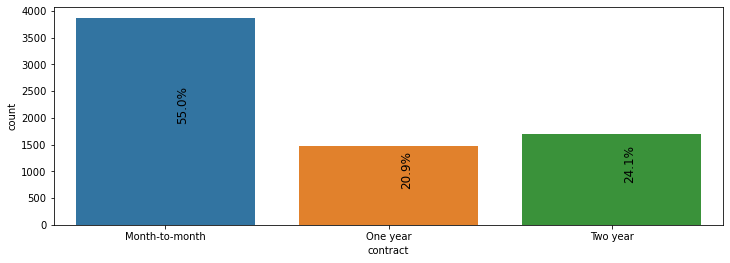

In [504]:
## visualize the contract
plt.figure(figsize=(12,4))
total = len(inp)
ax = sns.countplot(data=inp, x='contract')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 +0.05
    y = p.get_y() + p.get_height()/2
    ax.annotate(text = percentage, xy = (x,y), rotation=90,size=12)
plt.show()

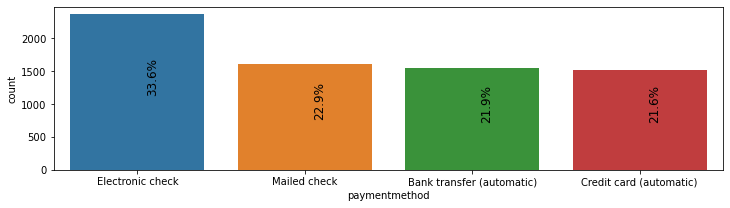

In [505]:
## visualize the paymentmethod 
plt.figure(figsize=(12,3))
total = len(inp)
ax = sns.countplot(data=inp, x='paymentmethod')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 + 0.05
    y = p.get_y() + p.get_height()/2
    ax.annotate(text = percentage, xy=(x,y), rotation=90, size=12)
plt.show()

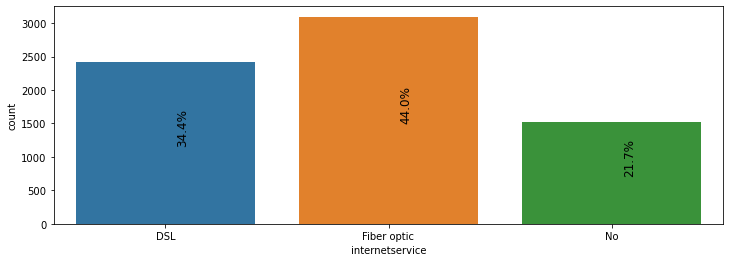

In [506]:
## visualize the internetservice
plt.figure(figsize=(12,4))
total = len(inp)
ax = sns.countplot(data=inp, x='internetservice')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2 +0.05
    y = p.get_y() + p.get_height()/2
    ax.annotate(text=percentage, xy=(x,y), rotation=90, size=12)
plt.show()

In [507]:
inp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   phoneservice      7043 non-null   int64  
 3   contract          7043 non-null   object 
 4   paperlessbilling  7043 non-null   int64  
 5   paymentmethod     7043 non-null   object 
 6   monthlycharges    7043 non-null   float64
 7   totalcharges      7043 non-null   object 
 8   churn             7043 non-null   int64  
 9   gender            7043 non-null   object 
 10  seniorcitizen     7043 non-null   int64  
 11  partner           7043 non-null   int64  
 12  dependents        7043 non-null   int64  
 13  multiplelines     7043 non-null   object 
 14  internetservice   7043 non-null   object 
 15  onlinesecurity    7043 non-null   object 
 16  onlinebackup      7043 non-null   object 


In [508]:
## convert categorical to numerical 

var = ['contract','paymentmethod','gender','internetservice']
dummy = pd.get_dummies(inp[var], drop_first=True)
inp = pd.concat([inp,dummy],axis=1)

## view the converted columns
inp.iloc[:,21:29].head()

,contract_One year,contract_Two year,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,gender_Male,internetservice_Fiber optic,internetservice_No
0,0,0,0,1,0,0,0,0
1,1,0,0,0,1,1,0,0
2,0,0,0,0,1,1,0,0
3,1,0,0,0,0,1,0,0
4,0,0,0,1,0,0,1,0


In [509]:
## converting pending categorical variable

## multilpleline
dummy_multipleline = pd.get_dummies(inp['multiplelines'], prefix='multiplelines')
inp = pd.concat([inp, dummy_multipleline],axis=1)

## onlinesecurity
dummy_onlinesecurity = pd.get_dummies(inp['onlinesecurity'], prefix='onlinesecurity')
inp = pd.concat([inp, dummy_onlinesecurity], axis=1)

##onlinebackup
dummy_onlinebackup = pd.get_dummies(inp['onlinebackup'], prefix='onlinebackup')
inp = pd.concat([inp, dummy_onlinebackup],axis=1)

##deviceprotection
dummy_device = pd.get_dummies(inp['deviceprotection'], prefix='deviceprotection')
inp = pd.concat([inp, dummy_device], axis=1)

##techsupport
dummy_tech = pd.get_dummies(inp['techsupport'], prefix='techsupport')
inp = pd.concat([inp, dummy_tech], axis=1)

##streamingtv
dummy_tv = pd.get_dummies(inp['streamingtv'], prefix='streamingtv')
inp = pd.concat([inp, dummy_tv], axis=1)

##streamingmovies
dummy_movies = pd.get_dummies(inp['streamingmovies'], prefix='streamingmovies')
inp = pd.concat([inp, dummy_movies], axis=1)

inp.iloc[:,29:].head()

,multiplelines_No,multiplelines_No phone service,multiplelines_Yes,onlinesecurity_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No,...,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes
0,0,1,0,1,0,0,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,0,1,1,0,0,0,...,1,1,0,0,1,0,0,1,0,0
2,1,0,0,0,0,1,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0
3,0,1,0,0,0,1,1,0,0,0,...,1,0,0,1,1,0,0,1,0,0
4,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [510]:
## drop converted categorical varaible
var = ['contract','paymentmethod','gender','internetservice','multiplelines','multiplelines_No phone service',
       'onlinesecurity','onlinesecurity_No internet service','onlinebackup','onlinebackup_No internet service',
       'deviceprotection','deviceprotection_No internet service','techsupport_No internet service','techsupport',
       'streamingtv','streamingtv_No internet service','streamingmovies','streamingmovies_No internet service',
       'customerid']
inp = inp.drop(var,axis=1)
inp.shape

(7043, 31)

<AxesSubplot:>

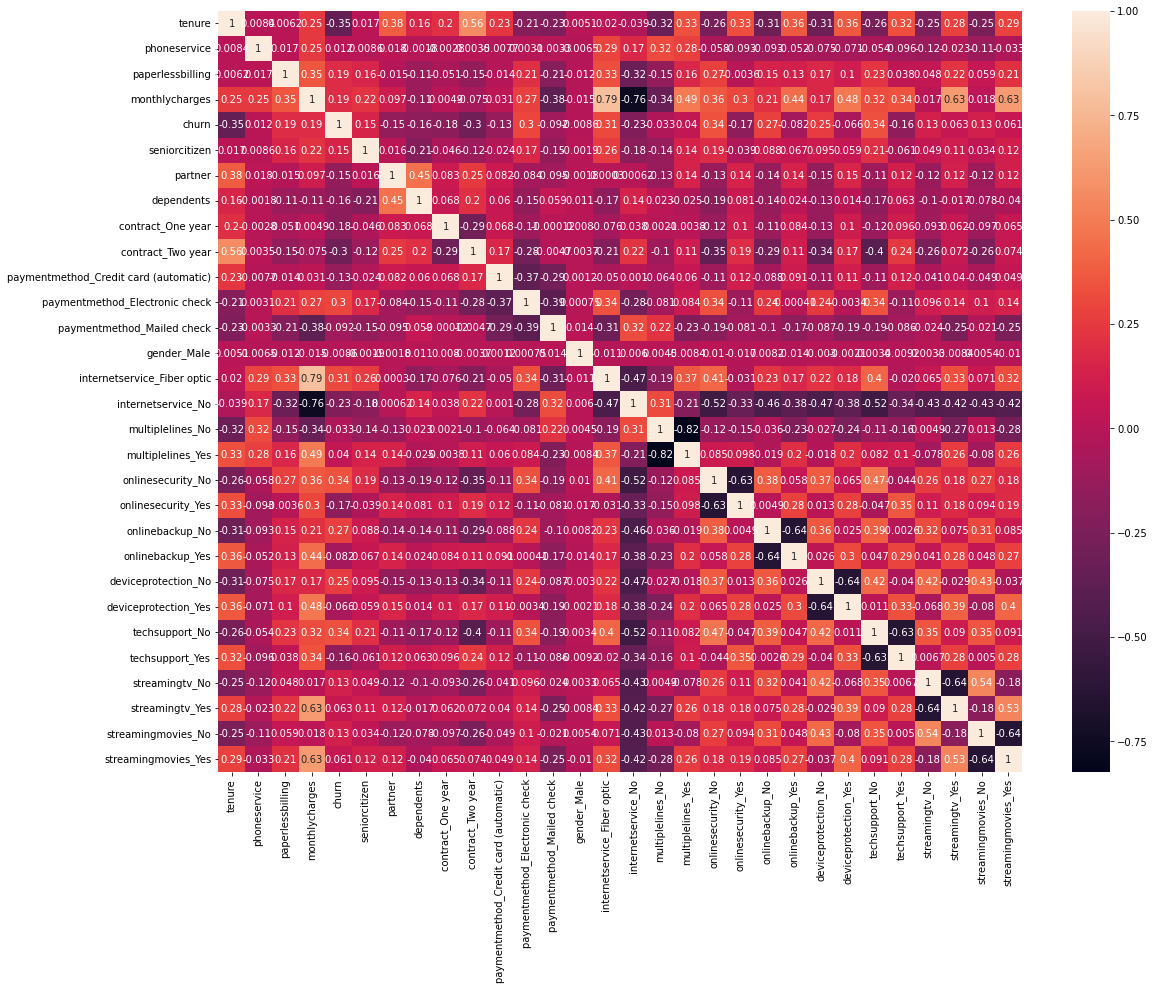

In [511]:
## visualize the correlation
plt.figure(figsize=(18,14))
sns.heatmap(data=inp.corr(), annot=True )

In [512]:
## drop the highly correlated values
inp = inp.drop(['multiplelines_No','onlinesecurity_No','onlinebackup_No','deviceprotection_No',
          'techsupport_No','streamingtv_No','streamingmovies_No'],axis=1)

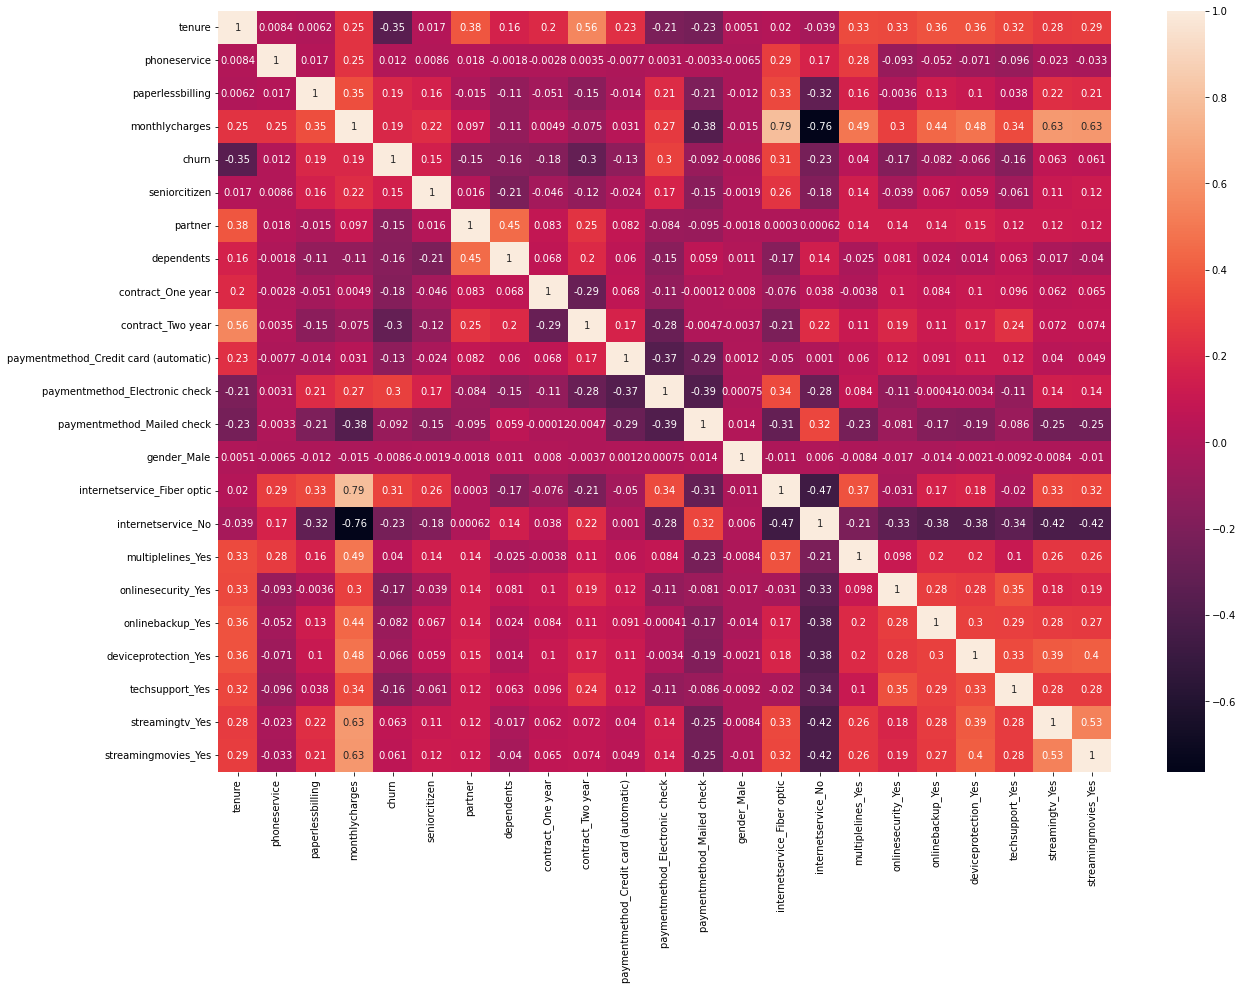

In [513]:
## after dropping high correlated value
plt.figure(figsize=(20,14))
sns.heatmap(data=inp.corr(), annot=True )
plt.show()

In [514]:
## in totalcharge column replace ' ',0
inp['totalcharges'] = inp['totalcharges'].replace(' ',0)
## convert object to numeric
inp['totalcharges'] = pd.to_numeric(inp['totalcharges'])

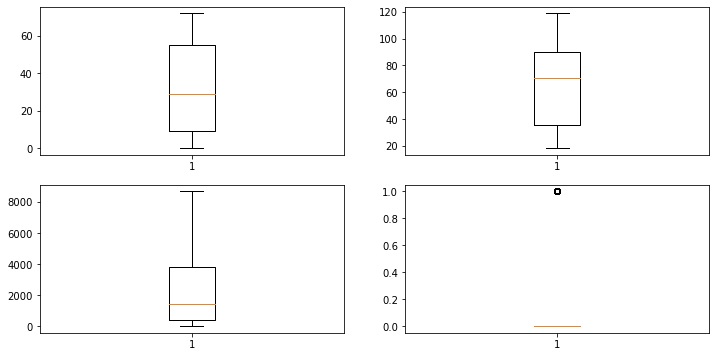

In [515]:
## outlier detection
var = inp[['tenure','monthlycharges','totalcharges','seniorcitizen']]
plt.figure(figsize=(12,6))
for num,col in enumerate(var):
    plt.subplot(2,2,num+1)
    plt.boxplot(var[col])
plt.show()

In [516]:
## outliers for continous varaible
var.describe(percentiles=(0.25,0.75,0.90,0.99))

,tenure,monthlycharges,totalcharges,seniorcitizen
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,0.162147
std,24.559481,30.090047,2266.794470,0.368612
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.500000,398.550000,0.000000
50%,29.000000,70.350000,1394.550000,0.000000
75%,55.000000,89.850000,3786.600000,0.000000
90%,69.000000,102.600000,5973.690000,1.000000
99%,72.000000,114.729000,8039.256000,1.000000
max,72.000000,118.750000,8684.800000,1.000000


In [517]:
### check missing values in the dataframe

round(100*(inp.isnull().sum()/len(inp.index)),2)

tenure                                   0.0
phoneservice                             0.0
paperlessbilling                         0.0
monthlycharges                           0.0
totalcharges                             0.0
churn                                    0.0
seniorcitizen                            0.0
partner                                  0.0
dependents                               0.0
contract_One year                        0.0
contract_Two year                        0.0
paymentmethod_Credit card (automatic)    0.0
paymentmethod_Electronic check           0.0
paymentmethod_Mailed check               0.0
gender_Male                              0.0
internetservice_Fiber optic              0.0
internetservice_No                       0.0
multiplelines_Yes                        0.0
onlinesecurity_Yes                       0.0
onlinebackup_Yes                         0.0
deviceprotection_Yes                     0.0
techsupport_Yes                          0.0
streamingt

- No Missing Values 

In [518]:
## churn rate
churn_rate = sum(inp['churn'])/len(inp['churn'].index)*100
churn_rate

26.536987079369588

### Build Model

In [519]:
##split the data into train and test
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(inp, train_size=0.7, test_size=0.3, random_state=100)
print(df_train.shape)
print(df_test.shape)

(4930, 24)
(2113, 24)


In [520]:
## scaling the model were mean=0 and std=1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

##scale the numerical varaible for train and test data
var = ['tenure','monthlycharges','totalcharges','seniorcitizen']
df_train[var] = scaler.fit_transform(df_train[var])
df_test[var] = scaler.transform(df_test[var])

In [521]:
## split into X and y for traing and testing
X_train = df_train
y_train = df_train.pop('churn')

X_test = df_test
y_test = df_test.pop('churn')

In [522]:
## run the model
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
log = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
log.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.0
Date:                Sat, 30 Dec 2023   Deviance:                       4016.1
Time:                        00:04:11   Pearson chi2:                 5.77e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.9414      1.531     -1.921      0.055      -5.942       0.059
tenure                                   -1.3441      0.179     -7.500      0.000      -1.695      -0.993
phoneservice                              0.4097      0.786      0.521      0.602      -1.131       1.950
paperlessbilling                          0.3453      0.090      3.828      0.000       0.169       0.522
monthlycharges                           -1.5336      1.162     -1.320      0.187      -3.812       0.744
totalcharges                              0.6103      0.190      3.215      0.001       0.238       0.982
seniorcitizen                             0.1084      0.038      2.877      0.004       0.035       0.182
partner                                   0.0272      0.094      0.289      0.772      -0.157       0.212
dependents                               -0.2207      0.108     -2.049      0.040      -0.432      -0.010
contract_One year                        -0.6736      0.129     -5.205      0.000      -0.927      -0.420
contract_Two year                        -1.3372      0.207     -6.452      0.000      -1.743      -0.931
paymentmethod_Credit card (automatic)    -0.1531      0.138     -1.108      0.268      -0.424       0.118
paymentmethod_Electronic check            0.2733      0.114      2.396      0.017       0.050       0.497
paymentmethod_Mailed check               -0.0916      0.139     -0.660      0.509      -0.364       0.180
gender_Male                              -0.0411      0.078     -0.525      0.600      -0.195       0.112
internetservice_Fiber optic               2.0221      0.967      2.091      0.037       0.127       3.917
internetservice_No                       -2.1794      0.977     -2.231      0.026      -4.094      -0.264
multiplelines_Yes                         0.5539      0.215      2.577      0.010       0.133       0.975
onlinesecurity_Yes                       -0.0429      0.217     -0.198      0.843      -0.467       0.382
onlinebackup_Yes                         -0.0206      0.211     -0.097      0.922      -0.435       0.394
deviceprotection_Yes                      0.2014      0.213      0.944      0.345      -0.217       0.620
techsupport_Yes                          -0.2538      0.219     -1.159      0.247      -0.683       0.175
streamingtv_Yes                           0.7001      0.397      1.764      0.078      -0.078       1.478
streamingmovies_Yes                       0.6689      0.396      1.688      0.091      -0.108       1.445
=========================================================================================================
"""

- There Many High p-value(0.05) in the model 

In [523]:
## Feature selection RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
rfe = RFE(estimator=log, n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('phoneservice', True, 1),
 ('paperlessbilling', True, 1),
 ('monthlycharges', False, 8),
 ('totalcharges', True, 1),
 ('seniorcitizen', False, 3),
 ('partner', False, 9),
 ('dependents', True, 1),
 ('contract_One year', True, 1),
 ('contract_Two year', True, 1),
 ('paymentmethod_Credit card (automatic)', False, 4),
 ('paymentmethod_Electronic check', True, 1),
 ('paymentmethod_Mailed check', False, 5),
 ('gender_Male', False, 7),
 ('internetservice_Fiber optic', True, 1),
 ('internetservice_No', True, 1),
 ('multiplelines_Yes', True, 1),
 ('onlinesecurity_Yes', True, 1),
 ('onlinebackup_Yes', True, 1),
 ('deviceprotection_Yes', False, 6),
 ('techsupport_Yes', True, 1),
 ('streamingtv_Yes', True, 1),
 ('streamingmovies_Yes', False, 2)]

In [524]:
## accepted columns for the model using rfe
column = X_train.columns[rfe.support_]
column

Index(['tenure', 'phoneservice', 'paperlessbilling', 'totalcharges',
       'dependents', 'contract_One year', 'contract_Two year',
       'paymentmethod_Electronic check', 'internetservice_Fiber optic',
       'internetservice_No', 'multiplelines_Yes', 'onlinesecurity_Yes',
       'onlinebackup_Yes', 'techsupport_Yes', 'streamingtv_Yes'],
      dtype='object')

In [525]:
##rebuild the model 
X_train_sm = sm.add_constant(X_train[column])
log = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
log.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4914
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2015.5
Date:                Sat, 30 Dec 2023   Deviance:                       4031.0
Time:                        00:04:12   Pearson chi2:                 5.86e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.9585      0.170     -5.647      0.000      -1.291      -0.626
tenure                            -1.3446      0.174     -7.746      0.000      -1.685      -1.004
phoneservice                      -0.6534      0.158     -4.137      0.000      -0.963      -0.344
paperlessbilling                   0.3610      0.090      4.022      0.000       0.185       0.537
totalcharges                       0.6508      0.182      3.578      0.000       0.294       1.007
dependents                        -0.2535      0.097     -2.621      0.009      -0.443      -0.064
contract_One year                 -0.6958      0.128     -5.421      0.000      -0.947      -0.444
contract_Two year                 -1.3743      0.206     -6.657      0.000      -1.779      -0.970
paymentmethod_Electronic check     0.3741      0.083      4.500      0.000       0.211       0.537
internetservice_Fiber optic        0.7921      0.118      6.688      0.000       0.560       1.024
internetservice_No                -0.9342      0.164     -5.710      0.000      -1.255      -0.614
multiplelines_Yes                  0.3184      0.096      3.327      0.001       0.131       0.506
onlinesecurity_Yes                -0.3055      0.102     -3.001      0.003      -0.505      -0.106
onlinebackup_Yes                  -0.2706      0.093     -2.915      0.004      -0.453      -0.089
techsupport_Yes                   -0.5305      0.104     -5.125      0.000      -0.733      -0.328
streamingtv_Yes                    0.2373      0.095      2.501      0.012       0.051       0.423
==================================================================================================
"""

In [526]:
## check feature varaible in the model
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif['feature'] = X_train[column].columns
vif['vif'] = [variance_inflation_factor(X_train[column].values,i) for i in range(X_train[column].shape[1])]
vif['vif'] = round(vif['vif'],2)
vif = vif.sort_values(by='vif', ascending=False)
vif

,feature,vif
1,phoneservice,9.23
3,totalcharges,7.62
0,tenure,6.43
8,internetservice_Fiber optic,4.01
9,internetservice_No,3.33
6,contract_Two year,3.27
2,paperlessbilling,2.73
10,multiplelines_Yes,2.50
14,streamingtv_Yes,2.43
12,onlinebackup_Yes,2.08


- Phoneservice: 9.23 high vif value 
    - Drop the phoneservice and rebuild model

In [527]:
## drop the varaible
column = column.drop('phoneservice')

## rebuild model
X_train_sm = sm.add_constant(X_train[column])
log = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4915
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2024.0
Date:                Sat, 30 Dec 2023   Deviance:                       4048.0
Time:                        00:04:12   Pearson chi2:                 5.58e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.3859      0.136    -10.193      0.000      -1.652      -1.119
tenure                            -1.2035      0.170     -7.072      0.000      -1.537      -0.870
paperlessbilling                   0.3604      0.089      4.028      0.000       0.185       0.536
totalcharges                       0.5191      0.179      2.895      0.004       0.168       0.871
dependents                        -0.2630      0.097     -2.725      0.006      -0.452      -0.074
contract_One year                 -0.7120      0.128     -5.559      0.000      -0.963      -0.461
contract_Two year                 -1.3796      0.206     -6.692      0.000      -1.784      -0.976
paymentmethod_Electronic check     0.3859      0.083      4.655      0.000       0.223       0.548
internetservice_Fiber optic        0.6291      0.110      5.715      0.000       0.413       0.845
internetservice_No                -1.1393      0.155     -7.370      0.000      -1.442      -0.836
multiplelines_Yes                  0.2544      0.094      2.720      0.007       0.071       0.438
onlinesecurity_Yes                -0.3200      0.102     -3.151      0.002      -0.519      -0.121
onlinebackup_Yes                  -0.2553      0.093     -2.756      0.006      -0.437      -0.074
techsupport_Yes                   -0.5444      0.103     -5.271      0.000      -0.747      -0.342
streamingtv_Yes                    0.2769      0.094      2.933      0.003       0.092       0.462
==================================================================================================
"""

In [528]:
vif = pd.DataFrame()
vif['feature'] = X_train[column].columns
vif['vif'] = [variance_inflation_factor(X_train[column].values,i) for i in range(X_train[column].shape[1])]
vif['vif'] = round(vif['vif'],2)
vif = vif.sort_values(by='vif',ascending=False)
vif

,feature,vif
2,totalcharges,7.53
0,tenure,6.32
5,contract_Two year,3.14
7,internetservice_Fiber optic,3.08
1,paperlessbilling,2.60
13,streamingtv_Yes,2.41
8,internetservice_No,2.36
9,multiplelines_Yes,2.27
11,onlinebackup_Yes,2.01
12,techsupport_Yes,1.99


- Totalcharges getting high vif values 7.53
    - drop the Totalcharge rebuild model

In [529]:
## drop the varaible
column = column.drop('totalcharges')

## rebuild model
X_train_sm = sm.add_constant(X_train[column])
log = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
log = log.fit()
log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4916
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2028.4
Date:                Sat, 30 Dec 2023   Deviance:                       4056.7
Time:                        00:04:13   Pearson chi2:                 5.12e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.4732      0.132    -11.167      0.000      -1.732      -1.215
tenure                            -0.7577      0.066    -11.566      0.000      -0.886      -0.629
paperlessbilling                   0.3557      0.089      3.981      0.000       0.181       0.531
dependents                        -0.2693      0.097     -2.790      0.005      -0.458      -0.080
contract_One year                 -0.7014      0.127     -5.511      0.000      -0.951      -0.452
contract_Two year                 -1.3510      0.204     -6.610      0.000      -1.752      -0.950
paymentmethod_Electronic check     0.3792      0.083      4.567      0.000       0.216       0.542
internetservice_Fiber optic        0.7799      0.097      8.053      0.000       0.590       0.970
internetservice_No                -1.1419      0.154     -7.409      0.000      -1.444      -0.840
multiplelines_Yes                  0.3019      0.092      3.289      0.001       0.122       0.482
onlinesecurity_Yes                -0.2838      0.101     -2.812      0.005      -0.482      -0.086
onlinebackup_Yes                  -0.2117      0.091     -2.315      0.021      -0.391      -0.032
techsupport_Yes                   -0.5009      0.102     -4.896      0.000      -0.701      -0.300
streamingtv_Yes                    0.3593      0.090      3.991      0.000       0.183       0.536
==================================================================================================
"""

In [530]:
vif = pd.DataFrame()
vif['feature'] = X_train[column].columns
vif['vif'] = [variance_inflation_factor(X_train[column].values,i) for i in range(X_train[column].shape[1])]
vif['vif'] = round(vif['vif'],2)
vif = vif.sort_values(by='vif',ascending=False)
vif

,feature,vif
4,contract_Two year,3.05
6,internetservice_Fiber optic,2.69
1,paperlessbilling,2.52
12,streamingtv_Yes,2.24
8,multiplelines_Yes,2.23
7,internetservice_No,1.99
10,onlinebackup_Yes,1.98
11,techsupport_Yes,1.96
0,tenure,1.91
3,contract_One year,1.82


In [531]:
X_train_sm.shape

(4930, 14)

In [532]:
##Prediction Train Set

y_train_pred = log.predict(X_train_sm)

## reshape the predicted value
y_train_pred = y_train_pred.values.reshape(-1)
churn = pd.DataFrame({'churn':y_train, 'churn_prob':y_train_pred})
churn['churn_id'] = y_train.index
churn['predict'] = churn['churn_prob'].apply(lambda x: 1 if x>0.5 else 0)
churn.head()

,churn,churn_prob,churn_id,predict
877,0,0.031045,877,0
5792,1,0.358095,5792,0
5334,1,0.074530,5334,0
878,0,0.041996,878,0
6578,0,0.096753,6578,0


In [533]:
## check the metrics model performing good 
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy_Score:', accuracy_score(churn['churn'], churn['predict']))
print('-'*100)
print('Confusion_Matrix:\n',confusion_matrix(churn['churn'], churn['predict']) )

Accuracy_Score: 0.8062880324543611
----------------------------------------------------------------------------------------------------
Confusion_Matrix:
 [[3259  368]
 [ 587  716]]


- Most Classification Problem Accuracy Metrics Not good to know the model Performance 
    - Accuracy gives equal importance for FPR and FNR:
        - eg: customer is churned reality customer not churned and customer not churn reality customer churned  

In [534]:
## Find model performance take TPR and TNR need to balanced to get good model
confusion = confusion_matrix(churn['churn'], churn['predict'])
print('TPR:', (confusion[1,1])/(confusion[1,1] + confusion[1,0]))
print('TNR:',(confusion[0,0])/(confusion[0,0] + confusion[0,1]))

TPR: 0.5495011511895626
TNR: 0.8985387372484147


 - TPR & TNR not balanced 

### ROC Curve
   - roc curve tradeoff between fpr and tpr

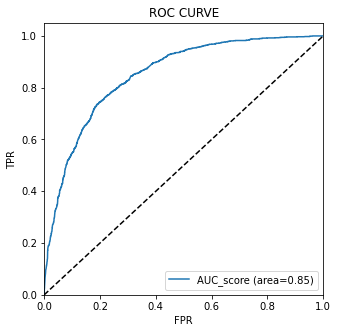

In [535]:
## visualize the roc curve
from sklearn import metrics
plt.figure(figsize=(5,5))
fpr,tpr,threshold = metrics.roc_curve(y_true=churn['churn'], y_score=churn['churn_prob'], drop_intermediate=False)
auc = metrics.roc_auc_score(y_true=churn['churn'], y_score=churn['churn_prob'])
plt.plot(fpr,tpr,label='AUC_score (area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ROC CURVE')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.show()

- AUC score 0.85 good score

### Cutoff Point

In [536]:
## lets create columns with different probality
number = [float(x)/10 for x in range(10)]
for i in number:
    churn[i] = churn['churn_prob'].map(lambda x: 1 if x>i else 0)
churn.head()

,churn,churn_prob,churn_id,predict,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
877,0,0.031045,877,0,1,0,0,0,0,0,0,0,0,0
5792,1,0.358095,5792,0,1,1,1,1,0,0,0,0,0,0
5334,1,0.074530,5334,0,1,0,0,0,0,0,0,0,0,0
878,0,0.041996,878,0,1,0,0,0,0,0,0,0,0,0
6578,0,0.096753,6578,0,1,0,0,0,0,0,0,0,0,0


In [537]:
## create dataframe for sensititvity, specificity and accuracy 
metric = pd.DataFrame(columns=['Probality','Accuracy','Sensitivity','Specificity'])
number = [float(x)/10 for x in range(10)]

for i in number:
    confusion = metrics.confusion_matrix(churn['churn'],churn[i])
    total = sum(sum(confusion))
    accuracy = (confusion[0,0] + confusion[1,1])/total
    sensitivity = confusion[1,1]/(confusion[1,1] + confusion[1,0])
    specificity = confusion[0,0]/(confusion[0,0] + confusion[0,1])
    metric.loc[i] = [i,accuracy, sensitivity, specificity]
metric

,Probality,Accuracy,Sensitivity,Specificity
0.0,0.0,0.264300,1.000000,0.000000
0.1,0.1,0.614402,0.943975,0.496002
0.2,0.2,0.719878,0.854950,0.671354
0.3,0.3,0.771400,0.772064,0.771161
0.4,0.4,0.795538,0.669992,0.840640
0.5,0.5,0.806288,0.549501,0.898539
0.6,0.6,0.800609,0.405986,0.942377
0.7,0.7,0.777688,0.221028,0.977667
0.8,0.8,0.742596,0.029163,0.998897
0.9,0.9,0.735700,0.000000,1.000000


<AxesSubplot:xlabel='Probality'>

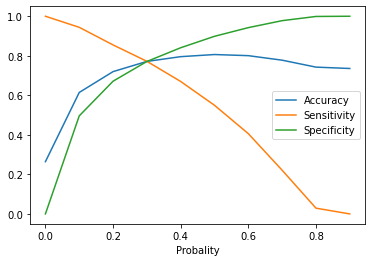

In [538]:
## let visualize find the cutoff
metric.plot.line(x='Probality',y=['Accuracy','Sensitivity','Specificity'])

- 0.35 optimum point cutoff probality

In [539]:
churn['final_pred'] = churn['churn_prob'].apply(lambda x: 1 if x>0.30 else 0)
churn.head()

,churn,churn_prob,churn_id,predict,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_pred
877,0,0.031045,877,0,1,0,0,0,0,0,0,0,0,0,0
5792,1,0.358095,5792,0,1,1,1,1,0,0,0,0,0,0,1
5334,1,0.074530,5334,0,1,0,0,0,0,0,0,0,0,0,0
878,0,0.041996,878,0,1,0,0,0,0,0,0,0,0,0,0
6578,0,0.096753,6578,0,1,0,0,0,0,0,0,0,0,0,0


In [540]:
## check the metrics model performing good 
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy_Score:', accuracy_score(churn['churn'], churn['final_pred']))
print('-'*100)
print('Confusion_Matrix:\n',confusion_matrix(churn['churn'], churn['final_pred']) )

Accuracy_Score: 0.7713995943204868
----------------------------------------------------------------------------------------------------
Confusion_Matrix:
 [[2797  830]
 [ 297 1006]]


In [541]:
## Find model performance take TPR and TNR need to balanced to get good model
confusion = confusion_matrix(churn['churn'], churn['final_pred'])
print('TPR:', (confusion[1,1])/(confusion[1,1] + confusion[1,0]))
print('TNR:',(confusion[0,0])/(confusion[0,0] + confusion[0,1]))

TPR: 0.7720644666155027
TNR: 0.7711607389026743


- Both TPR & TNR Balanced

### Prediction On Test Set

In [542]:
X_test_sm = sm.add_constant(X_test[column])

## prediction Test set from trained model
y_test_pred = log.predict(X_test_sm)
churn_test = pd.DataFrame({'churnID':y_test.index,'churn':y_test, 'churn_prob':y_test_pred})
churn_test['predicted'] = churn_test['churn_prob'].apply(lambda x: 1 if x>0.30 else 0)
churn_test

,churnID,churn,churn_prob,predicted
4880,4880,0,0.010912,0
1541,1541,0,0.005567,0
1289,1289,0,0.021652,0
5745,5745,0,0.011455,0
4873,4873,0,0.138259,0
...,...,...,...,...
1285,1285,1,0.766087,1
5092,5092,0,0.109186,0
5837,5837,0,0.498290,1
3597,3597,0,0.438102,1


In [543]:
## check the metrics model performing good 
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy_Score:', accuracy_score(churn_test['churn'], churn_test['predicted']))
print('-'*100)
print('Confusion_Matrix:\n',confusion_matrix(churn_test['churn'], churn_test['predicted']) )

Accuracy_Score: 0.7378135352579271
----------------------------------------------------------------------------------------------------
Confusion_Matrix:
 [[1135  412]
 [ 142  424]]


In [544]:
## Find model performance take TPR and TNR need to balanced to get good model
confusion = confusion_matrix(churn_test['churn'], churn_test['predicted'])
print('TPR:', (confusion[1,1])/(confusion[1,1] + confusion[1,0]))
print('TNR:',(confusion[0,0])/(confusion[0,0] + confusion[0,1]))

TPR: 0.7491166077738516
TNR: 0.733678086619263


- Test Case Both TPR & and TNR are Balanced model Perform Good